# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np

# Create two new dataframes

north_df = pd.read_csv('https://raw.githubusercontent.com/e3la/call-center-cleanup-assignment/main/NorthCallCenter.csv')
south_df = pd.read_csv('https://raw.githubusercontent.com/e3la/call-center-cleanup-assignment/main/SouthCallCenter.csv')

#I bring in the csv this way because it works with google colab

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:
north_df.columns
#I'm getting each of the columns so I can figure out where the reps will be found

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [3]:
north_df.sample()
#just to get a feel for what a row/record looks like

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1


In [4]:
rep_count_north = north_df['Rep ID'].value_counts()
#by looking in the column of 'Rep ID' I can run the method .value_counts to count how many are in the column
rep_count_north

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

There are 9 reps at the North Branch.

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
rep_count_south = south_df['Rep ID'].value_counts()
#by looking in the column of 'Rep ID' I can run the method .value_counts to count how many are in the column
rep_count_south

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

There are 11 reps at the South Branch.

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch?

In [138]:
#Code Used:
north_df.describe()
#I take the data, it's a dataframe, and I use describe, which does math on all the number stuff - summary of main statistics, which includes mean / average which is what the question is looking for

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


The average Busy Minutes is 9.987755<br>
The average Not Ready Minutes	is 1.914286	<br>
The averge Incoming Wait Time	is 3.048780	<br>
The average During Call Wait Time	is 2.967347	<br>
at the North branch

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch?

In [7]:
#Code Used:
south_df.describe()
#I take the data, it's a dataframe, and I use describe, which does math on all the number stuff - summary of main statistics, which includes mean / average which is what the question is looking for


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


The average Busy Minutes is 10.05414	<br>
The average Not Ready Minutes	is 1.910828	<br>
The averge Incoming Wait Time	is 3.0	<br>
The average During Call Wait Time	is 3.076433	<br>
at the South branch

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
from os.path import join
# Code Used:
north_time_counts = north_df['Time Block'].value_counts()
#looking at the north dataframe in the Time Block column to find the number of calls
north_time_counts


12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [9]:
south_time_counts = south_df['Time Block'].value_counts()
#now I'm looking at the south dataframe in the Time Block column to find the number of calls
south_time_counts

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [10]:
combo_counts = south_time_counts.add(north_time_counts)
#this is a combo of both the count of calls in both call centers, taking the south and adding the north
combo_counts

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.07
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking.

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: I used isna sums to look for missing data. There is missing cells in the Incoming Wait Time column for both the North and the South Center. I suspect a blank means there was no time waited.

In [11]:
# Code Used
# Add Additional Cells as needed.
north_df.isna().sum()
#I'm using isna sums to look for missing data - there is missing values in the Incoming Wait Time column for the north center -the blank probably means no time was waited

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [12]:
south_df.isna().sum()
#I'm using isna sums to look for missing data - there is missing values in the Incoming Wait Time column for the south center -the blank probably means no time was waited

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I replaced the 'YES' and 'YES ' with 'yes'

In [13]:
#Code Used
# Add Additional Cells as needed.

north_df['Sale'].value_counts()
# counts each unique value in the 'Sale' column of the north_df
filtered_north_not_no_sale = north_df[north_df['Sale'] != 'NO']
#creating a new df, which is a subset from the north datafram where the sale doesn't equal no
#filtered_north_not_no_sale
#that line was see what it looked like before I did the next replace
north_df['Sale'] = north_df['Sale'].replace(['YES ','YES'], 'yes')
#this replace makes both YES with a space after it, and YES with no space become yes in lower case
filtered_north_not_no_sale
#this just makes the table appear so I can see if it looks right

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no dupliactes - atleast according to the sum of .duplicated()

In [14]:
#Code Used
# Add Additional Cells as needed.

north_df.duplicated().sum()
#this is to check if there are duplicates in the north dataframe
#at first I thought I should do a count, but a count is all wrong because it counts all rows, sum is of the True values (equals 1)

0

In [15]:
south_df.duplicated().sum()
#this is to check if there are duplicates in the south dataframe
#at first I thought I should do a count, but a count is all wrong because it counts all rows, sum is of the True values (equals 1)

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer:  The Calls column is always one, I ignored it but it is unnecessary, unless there is some future instances when there is a second call somehow. I would guess the column exists for a future potential input that hasn't come up.

In [16]:
#Code Used
# Add Additional Cells as needed.

south_df['Calls'].value_counts()
#.value_counts() is a method that counts the occurrences of unique values in the ['Calls'] column in the south dataframe

1    314
Name: Calls, dtype: int64

In [17]:
north_df.describe()
north_df['Calls'].value_counts()

#.value_counts() is a method that counts the occurrences of unique values in the ['Calls'] column in the north dataframe

1    245
Name: Calls, dtype: int64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [18]:
# Create dataframe for the entire company named df

df = pd.concat([south_df, north_df], axis=0)
#this is concating the two dataframe into a new one, I named it df because that's the kind of default name for your big dataframe in all the examples
df.columns
#I requested the columns information to see how the dataframe looks

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [19]:
# Code Used
# Add Additional Cells as needed.

In [20]:
df.groupby(["Branch","Rep ID"])["Branch"].count().sort_values(ascending=False)
#I use the big dataframe and group first by branch (be it north or south) and by Rep ID, the value I'm looking at is the count, who has the highest call is found with this count(), I sorted teh whole thing descending by setting the ascending to false
#this is what gave me the answer of Brenct & Eric

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Duke      29
        Todd      29
South   Kate      29
        George    29
        Karl      28
        Josh      26
        Susan     26
North   Joe       26
South   Sharon    25
North   Xander    24
        Cam       24
        Andy      23
        Amanda    23
South   Alice     20
Name: Branch, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? <br>
Yes, the south branch is less than 1.3% which is below the optimal range and causes the company wide range to dip below 2%.

In [21]:
# Code Used
# Add Additional Cells as needed.

df["Abandoned"].mean()
#to find the abandoned average time, I used .mean() on the combo dataframe simply named df on the "Abandoned" column

0.01967799642218247

In [22]:
south_df["Abandoned"].mean()
#to find the abandoned average time, I used .mean() on the just south dataframe simply named df on the "Abandoned" column

0.012738853503184714

In [23]:
north_df["Abandoned"].mean()
#to find the abandoned average time, I used .mean() on the just north dataframe simply named df on the "Abandoned" column

0.02857142857142857

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 17 calls, 15.10%
- South Branch = 20 calls, 11.78%
- Company Wide = 37 calls, 6.62%

In [24]:
# Code Used
# Add Additional Cells as needed.

Within_2sec = (df["Incoming Wait Time"]<2).sum()
#make a new variable, the sum of instances of incoming wait time that were less than 2 from the length of incoming wait time (seconds)
Within_2sec_percentage = (Within_2sec / len(df["Incoming Wait Time"]))
#find the percentage of instances that had less than 2 seconds of wait time by dividing it by the length of the column of incoming wait time from the combo dataset
print(Within_2sec,"Company Wide")
print(Within_2sec_percentage,"Company Wide")
#print the answers with contextualizing information

37 Company Wide
0.06618962432915922 Company Wide


In [25]:
Within_2sec_N = (north_df["Incoming Wait Time"]<2).sum()
#just from the north dataset make a new variable, the sum of instances of incoming wait time that were less than 2 from the length of incoming wait time (seconds)
Within_2sec_percentage_N = (Within_2sec / len(north_df["Incoming Wait Time"]))
#just within the north dataset find the percentage of instances that had less than 2 seconds of wait time by dividing it by the length of the column of incoming wait time from the combo dataset
print(Within_2sec_N,"North")
print(Within_2sec_percentage_N,"North")
#print the answers for the north call center

17 North
0.1510204081632653 North


In [26]:
Within_2sec_S = (south_df["Incoming Wait Time"]<2).sum()
#just from the south dataset make a new variable, the sum of instances of incoming wait time that were less than 2 from the length of incoming wait time (seconds)
Within_2sec_percentage_S = (Within_2sec / len(south_df["Incoming Wait Time"]))
#just within the south dataset find the percentage of instances that had less than 2 seconds of wait time by dividing it by the length of the column of incoming wait time from the combo dataset
print(Within_2sec_S,"South")
print(Within_2sec_percentage_S,"South")
#print the answers for the south call center

20 South
0.1178343949044586 South


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [27]:
# Code Used

speed_of_answer = (df["Incoming Wait Time"]).mean()
#create a new variable, the average for the incoming wait time column from the company wide dataset
print(speed_of_answer,"Company wide")
#print the answer for the whole company
speed_of_answer_n = (north_df["Incoming Wait Time"]).mean()
#create a new variable, the average for the incoming wait time column from the north branch
print(speed_of_answer_n,"at the north branch")
#print the answer for the north branch
speed_of_answer_s = (south_df["Incoming Wait Time"]).mean()
#create a new variable, the average for the incoming wait time column from the south branch
print(speed_of_answer_s,"at the south branch")
#print the answer for the south branch

3.019230769230769 Company wide
3.048780487804878 at the north branch
3.0 at the south branch


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why:
I chose a bar chart, which are helpful to compare metric values across different subgroups of data. The bar chart compairs the categorical data of the 4 groups: queues A, B, C, & D for which we want to compare the values.

<ipython-input-28-13966f284cf1>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


Text(0, 0.5, 'Abandonment Rate Per Queue')

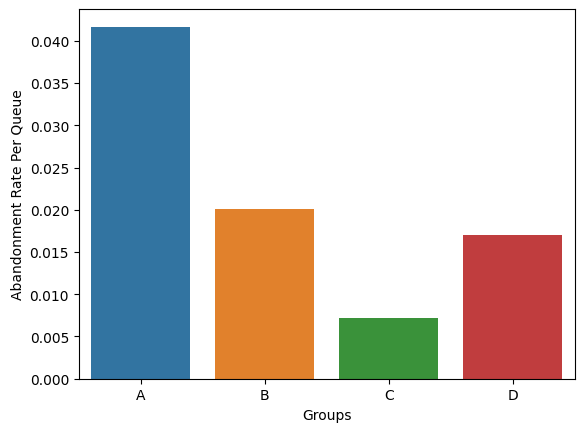

In [28]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import seaborn as sns
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

#Your Code Here:

# Vertical

labels = list(abandonment_rates.keys())
#make a label list from the abandonment_rates dictionary
amounts = list(abandonment_rates.values())
#make an amount list from the abandonment_rates dictionary

sns.barplot(x=labels, y=amounts)
#make a bar plot with labels and amounts
plt.xlabel('Groups')
#label the x axis groups
plt.ylabel('Abandonment Rate Per Queue')
#label the y axis


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why:
I think the grouped bar chart tells the story better than the scatter plot, but both were fun to figure out.

In [103]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level Percent"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level["SLPlabel"] = service_level["Service Level Percent"].astype(int).astype(str)+"%"
#create readable labels for the Service Level Percent
north_plt["IWTlabel"] = north_plt["Incoming Wait Time"].round(2)
#create readable labels for the Incoming Wait Time

vis2_df = pd.merge(service_level, north_plt, on="Rep ID")
#sorted_vis2_df = vis2_df.sort_values(by="Incoming Wait Time", ascending=False)
# I tried to sort the chart, but the labels won't line up when I do that
print(sorted_vis2_df)




   Rep ID  Calls_x  Calls_y  Service Level Percent SLPlabel  \
1    Andy        3       10              30.000000      30%   
5     Joe        2       10              20.000000      20%   
7    Todd        2        6              33.333333      33%   
8  Xander        2        6              33.333333      33%   
6   Lilly        4       12              33.333333      33%   
3     Cam        5       11              45.454545      45%   
4    Duke        6       14              42.857143      42%   
0  Amanda        3        5              60.000000      60%   
2   Brent        6        8              75.000000      75%   

   Incoming Wait Time  IWTlabel  
1            3.600000      3.60  
5            3.600000      3.60  
7            3.500000      3.50  
8            3.333333      3.33  
6            3.083333      3.08  
3            2.909091      2.91  
4            2.785714      2.79  
0            2.400000      2.40  
2            2.125000      2.12  


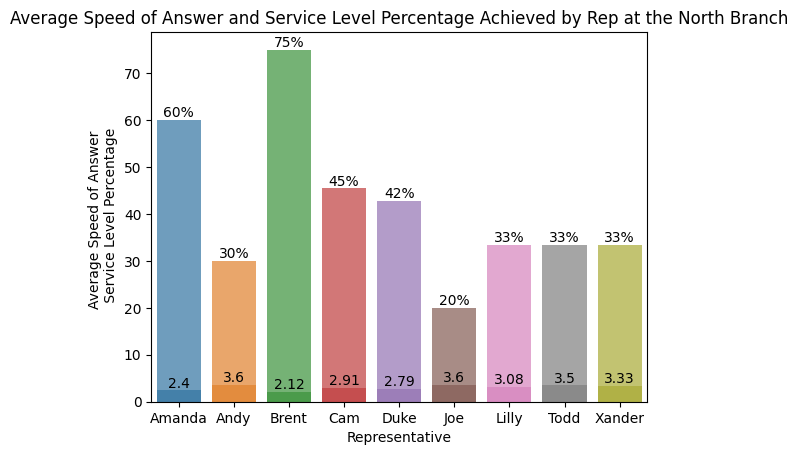

In [104]:
# Create the bar chart with two stacked bars for each rep
sns.barplot(x='Rep ID', y='Incoming Wait Time', data=vis2_df, alpha=0.7)
sns.barplot(x='Rep ID', y="Service Level Percent", data=vis2_df, alpha=0.7)

# Create labels on the bars to help with reading:
for index, row in vis2_df.iterrows():
    plt.text(index, row['Incoming Wait Time'], row['IWTlabel'], ha='center', va='bottom')
    plt.text(index, row['Service Level Percent'], row['SLPlabel'], ha='center', va='bottom')


# Add labels and title
plt.xlabel('Representative')
plt.ylabel('Average Speed of Answer \n Service Level Percentage')
plt.title('Average Speed of Answer and Service Level Percentage Achieved by Rep at the North Branch')

# Show the plot
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why:
Since we have the number of all the calls, and we want to show off each one, I decided 3 pie charts next to each other would do well.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


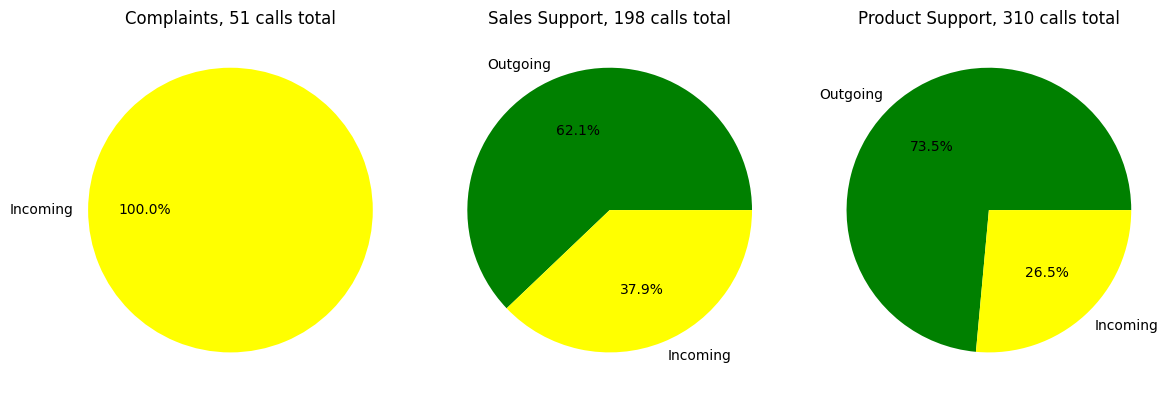

In [126]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
fig, (complaintpie, salespie, productpie) = plt.subplots(1,3, figsize=(12, 4))
#I want the 3 pie charts next to each other

complaints_labels = list(complaints.keys())
complaints_values = list(complaints.values())
#make variables of what is being graphed so it can be graphed

colors0 = ['yellow','green']
colors1 = ['green','yellow']
#the first instance only has one color, and it should match the outgoing, but since there is only outcoming it was looking green, and so I flipped it in the coloring of the graphs

complaintpie.pie(complaints_values, labels=complaints_labels, colors=colors0, autopct='%1.1f%%')
#this is my complaints pie chart, with values and labels and a color and percent showing

sales_labels = list(sales_support.keys())
sales_values = list(sales_support.values())

salespie.pie(sales_values, labels=sales_labels, colors=colors1, autopct='%1.1f%%')
#this is my sales pie chart, with values and labels and a color and percent showing



product_labels = list(product_support.keys())
product_values = list(product_support.values())

productpie.pie(product_values, labels=product_labels, colors=colors1, autopct='%1.1f%%')

#this is my product pie chart, with values and labels and a color and percent showing


complaintpie.set_title("Complaints, 51 calls total")
salespie.set_title("Sales Support, 198 calls total")
productpie.set_title("Product Support, 310 calls total")

#these are the pie chart titles, which also just says how many calls there were
#I looked into making all the pie charts different sizes from each other, but it wasn't worth it

plt.tight_layout()
plt.show()

# Create the bar chart using Seaborn


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer:

The North Branch has a lower abandonment rate and a higher service level. The north has a ever so slightly slower average speed of answer but it's a difference of .05 - so perhaps it isn't so different. The North Branch is operating more efficiently.



| Metric                           | North Branch  | South Branch  |
|----------------------------------|---------------|---------------|
| Abandonment Rate                 | 2.0%          | 3.5%          |
| Service Level Percentage         | 15.10%        | 11.78%        |
| Average Busy Minutes             | 9.987755      | 10.05414      |
| Average Not Ready Minutes        | 1.914286      | 1.910828      |
| Average Incoming Wait Time       | 3.048780      | 3.0           |
| Average During Call Wait Time    | 2.967347      | 3.076433      |
| Average Speed of Answer (seconds)| 3.05          | 3.00          |
| Number of Represenatives         | 9             | 11.00         |

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer:
The South branch is not operating as efficently as the north branch. I believe the south branch could benefit from extra help. I would suggest looking at Brent and Amanda at the north branch workflows as they may have reproducable strategies for achieving high service levels and low incoming wait times.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?


##### Record your answer by double clicking here:
> Your Answer: I'm curious about the differences between the south branch and the north branch. What determines the sorts of calls that go to each, and are the training practices at the two locations any different? Do they have different snacks at the two locations?

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why:

In [142]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: